# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [52]:
! pip install opencv-python
! pip install scikit-image

In [7]:
import matplotlib.pyplot as plt
import cv2 # нужно поставить себе cv2 через conda install opencv

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

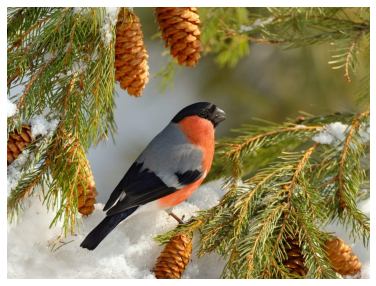

In [421]:
img = cv2.imread('birds.png') # считать картинку
draw_picture(img) # нарисовать картинку

In [14]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей

(900, 1200, 3)


In [16]:
img.reshape((900 * 1200, 3))

array([[[192, 183, 163],
        [203, 195, 182],
        [197, 198, 194],
        ...,
        [  8,  87,  90],
        [ 20,  99, 102],
        [ 47, 128, 131]],

       [[205, 211, 194],
        [168, 185, 172],
        [113, 146, 139],
        ...,
        [ 15,  89,  93],
        [ 34, 111, 114],
        [ 64, 143, 146]],

       [[119, 149, 138],
        [ 90, 135, 126],
        [ 52, 121, 111],
        ...,
        [ 26,  97, 101],
        [ 52, 125, 129],
        [ 84, 158, 162]],

       ...,

       [[215, 227, 229],
        [210, 222, 224],
        [220, 232, 234],
        ...,
        [209, 221, 225],
        [208, 220, 224],
        [213, 226, 228]],

       [[214, 226, 228],
        [209, 221, 223],
        [219, 231, 233],
        ...,
        [206, 218, 222],
        [206, 218, 222],
        [211, 224, 226]],

       [[214, 226, 228],
        [209, 221, 223],
        [219, 231, 233],
        ...,
        [205, 217, 221],
        [207, 219, 223],
        [212, 225, 227]]

In [428]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from numpy import copy
from skimage.metrics import structural_similarity as ssim

def kmeanspic(X, n, width, height):
    model = KMeans(n_clusters=n).fit(X)
    pixels = model.labels_
    colours = model.cluster_centers_
    image = np.ones((width * height, 3)) * (-1)
    for i in range(len(colours)): image[pixels == i] = colours[i]
    new_image = image.reshape((width, height, 3))
    draw_picture(new_image)
    print(f'Ssim is {ssim(X.reshape((width, height, 3)), new_image, multichannel=True)}')

def dbscanpic(X, eps, min_samples, width, height):
    model = DBSCAN(eps=eps, min_samples=min_samples, metric='l2').fit(X)
    pixels = model.labels_
    colours = [np.median(X[pixels == i], axis=0) for i in set(pixels)]
    image = np.ones((width * height, 3)) * (-1)
    for i in range(len(colours)): image[pixels == i] = colours[i]
    new_image = image.reshape((width, height, 3))
    draw_picture(new_image)
    print(f'Ssim is {ssim(X.reshape((width, height, 3)), new_image, multichannel=True)}')
    print('Number of blowout (black) pixels: {}'.format(len(pixels[pixels == -1])))

def aglomclpic(X, n, width, height):
    model = AgglomerativeClustering(n_clusters=n, linkage='complete').fit(X)
    pixels = model.labels_
    colours = [np.median(X[pixels == i], axis=0) for i in set(pixels)]
    image = np.ones((width * height, 3)) * (-1)
    for i in range(len(colours)): image[pixels == i] = colours[i]
    new_image = image.reshape(((width, height, 3)))
    draw_picture(new_image)
    print(f'Ssim is {ssim(X.reshape((width, height, 3)), new_image, multichannel=True)}')

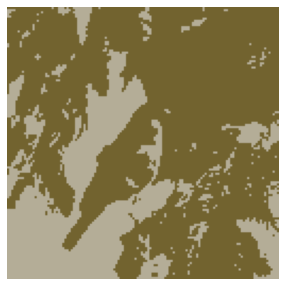

Ssim is 0.6328329427148094


In [429]:
from skimage.transform import resize

width, height = 128, 128

X = resize(img, (width, height)).reshape((width * height, 3))

kmeanspic(X, 2, width, height)

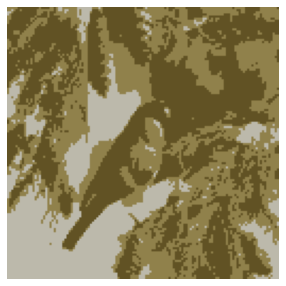

Ssim is 0.7430539237013741


In [430]:
kmeanspic(X, 3, width, height)

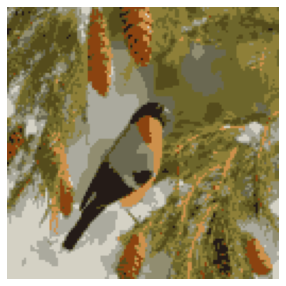

Ssim is 0.8749408475380217


In [431]:
kmeanspic(X, 10, width, height)

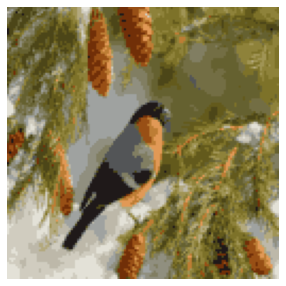

Ssim is 0.9261944141280131


In [432]:
kmeanspic(X, 20, width, height)

Результаты довольно высоки. Алгоритм подходит для данного изображения, по средним цветам он строит чёткие кластеры, делящие палитру на блоки - это то, что и требовалось. Диаграмма Вороного вполне подходит для деления пространства цветов на блоки.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


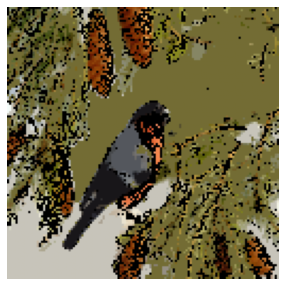

Ssim is 0.1807354766292287
Number of blowout (black) pixels: 2897


In [426]:
from skimage.transform import resize

width, height = 128, 128

X = resize(img, (width, height)).reshape((width * height, 3))

dbscanpic(X, 0.01, 2, width, height)

Результат очень низкий, подобрать параметры крайне тяжело, легко залить все цвета одним цветом или сделать их выбросами. Расстояние между цветами - неочевидная вещь, поэтому способ подбора eps очень смутен. Кроме того, палитра цветов такого красочного изображения почти сплошная, расстояния между соседними по значениям цветами очень малы, поэтому данный алгоритм легко смешивает их в один довольно большой кластер (например, видно, что фон за птичкой на исходном изображении состоит из зелёного, белого, синего цветов, на выходном же изображении алгоритм залил их все зелёным, хотя расстояние я указал довольно маленькое - 0.01. Вероятно, от того, что цвета плавно перетекают друг в друга, алгоритм от одного цвета дошёл до другого и поместил в один кластер). Из-за маленьких значений eps появляется много выбросов, некоторые уникальные, редкие для данного изображения цвета не захватываются алгоритмом. Для изображения это плохо - непонятно, чем заполнять выбросы

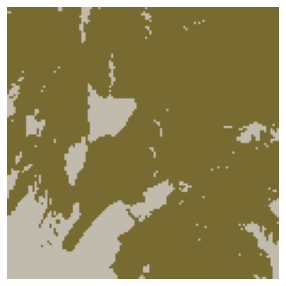

Ssim is 0.537849155209944


In [414]:
width, height = 128, 128

X = resize(img, (width, height)).reshape((width * height, 3))

aglomclpic(X, 2, width, height)

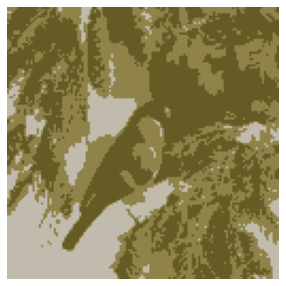

Ssim is 0.7280215419478696


In [415]:
aglomclpic(X, 3, width, height)

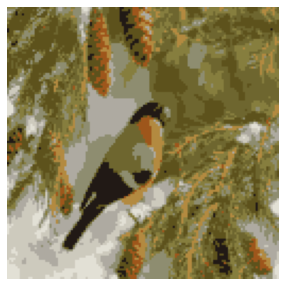

Ssim is 0.8579861108305115


In [416]:
aglomclpic(X, 10, width, height)

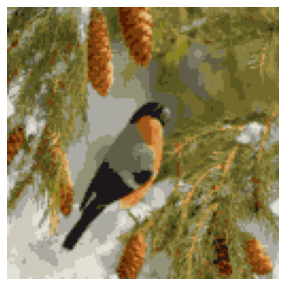

Ssim is 0.899154616636637


In [433]:
aglomclpic(X, 20, width, height)

Результат очень близок к результату метода k средних.

<b>Вывод: </b>Лучший результат получился у метода k средних, далее по качеству идёт аггломеративная кластеризация, худший же результат получился у метода DBSCAN.

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [437]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [438]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [440]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [441]:
y.shape

(2370,)

In [442]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

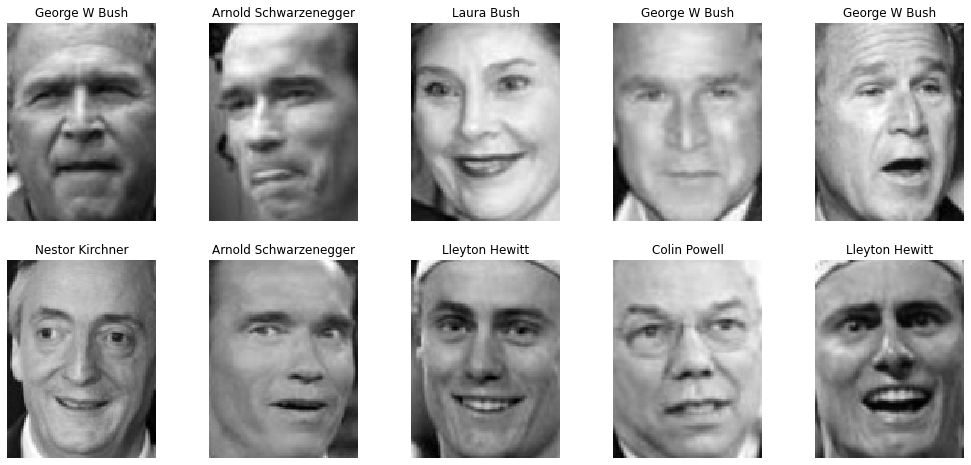

In [443]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

In [444]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression


cross_val_score(LogisticRegression(),
               X, y,
               scoring='accuracy').mean()

0.6780590717299578

Пробую логрег.

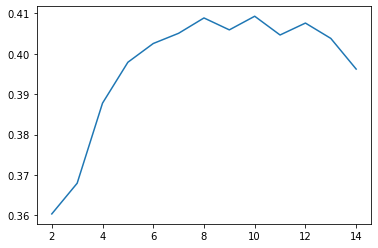

In [445]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.pyplot import plot

xx, yy = [], []

for k in range(2, 15):
    xx.append(k)
    yy.append(cross_val_score(KNeighborsClassifier(n_neighbors=k),
               X, y,
               scoring='accuracy').mean())
plot(xx, yy)

Пробую метод ближайших соседей.

In [446]:
cross_val_score(KNeighborsClassifier(n_neighbors=10),
               X, y,
               scoring='accuracy').mean()

0.4092827004219409

Логрег дал самый высокий результат.

In [447]:
from collections import Counter

Counter(y).most_common()

[(8, 530),
 (5, 236),
 (31, 144),
 (7, 121),
 (9, 109),
 (3, 77),
 (13, 71),
 (19, 60),
 (15, 55),
 (17, 53),
 (14, 52),
 (28, 52),
 (33, 49),
 (23, 48),
 (10, 44),
 (4, 42),
 (16, 42),
 (21, 41),
 (22, 41),
 (12, 39),
 (0, 39),
 (25, 37),
 (2, 36),
 (1, 35),
 (24, 33),
 (30, 33),
 (29, 33),
 (20, 32),
 (27, 32),
 (32, 32),
 (6, 31),
 (18, 31),
 (26, 30),
 (11, 30)]

In [448]:
530 / len(y)

0.22362869198312235

Видно, что модели отлично справляются, тупой метод ответа самым популярным именем может дасть лишь 22% попаданий.

Теперь проверю, как отразится на точности уменьшение размерности.

In [449]:
from sklearn.decomposition import PCA

pca = PCA(n_components=180)
X_PCA = pca.fit(X).transform(X)

cross_val_score(KNeighborsClassifier(n_neighbors=10), X_PCA, y, scoring='accuracy').mean()

0.4219409282700422

Получили прирост метрики (параметры подобрал ручным подором, цикл у меня исполняется слишком долго).

In [454]:
pca = PCA(n_components=2370)
X_PCA = pca.fit(X).transform(X)

cross_val_score(LogisticRegression(), X_PCA, y, scoring='accuracy').mean()

0.6987341772151898

Снова уменьшение размерности повысило метрику и скорость выполнения.

In [455]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, n_iter=400)
X_tSNE = tsne.fit_transform(X)

cross_val_score(KNeighborsClassifier(n_neighbors=10), X_tSNE, y, scoring='accuracy').mean()

0.340084388185654

In [456]:
cross_val_score(LogisticRegression(), X_tSNE, y, scoring='accuracy').mean()

0.24725738396624478

tSNE дал довольно низкие по сравнению с PCA результаты. Видимо, уменьшение кол-ва измерений с 11750 до 2-3 - это слишком большая потеря информации.

В данном случае наиболее предпочтительным алгоритмом уменьшения размерности является PCA, так как он лишён ограничения в 2-3 измерения.

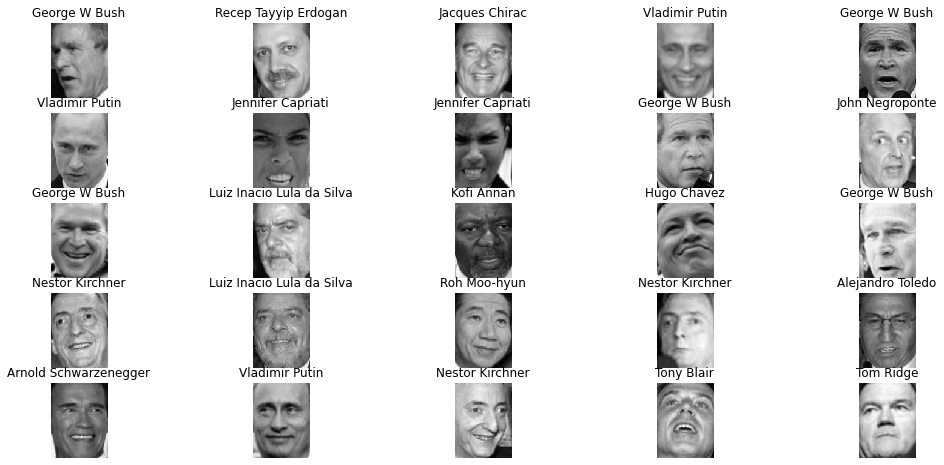

In [316]:
x_train, x_test, y_train, y_test, train_ids, test_ids = train_test_split(X_PCA, y, np.array(range(len(y))), test_size=0.2)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
plot_grid(test_ids[y_test != y_pred][:25], nrows=5, ncols=5)

In [346]:
errors = [names[y_test[y_test != y_pred][:10]]]
errors.append(names[y_pred[y_test != y_pred][:10]])
errors

[array(['George W Bush', 'Recep Tayyip Erdogan', 'Jacques Chirac',
        'Vladimir Putin', 'George W Bush', 'Vladimir Putin',
        'Jennifer Capriati', 'Jennifer Capriati', 'George W Bush',
        'John Negroponte'], dtype='<U25'),
 array(['Donald Rumsfeld', 'Ariel Sharon', 'Arnold Schwarzenegger',
        'David Beckham', 'Arnold Schwarzenegger', 'Tony Blair',
        'George W Bush', 'George W Bush', 'Colin Powell', 'George W Bush'],
       dtype='<U25')]

In [342]:
Counter(names[y_test[y_test != y_pred]]).most_common()

[('George W Bush', 26),
 ('Colin Powell', 14),
 ('Vladimir Putin', 10),
 ('Arnold Schwarzenegger', 9),
 ('Tony Blair', 9),
 ('Donald Rumsfeld', 7),
 ('Recep Tayyip Erdogan', 6),
 ('Jennifer Capriati', 6),
 ('John Negroponte', 6),
 ('Luiz Inacio Lula da Silva', 6),
 ('Ariel Sharon', 6),
 ('Jacques Chirac', 5),
 ('John Ashcroft', 5),
 ('Jean Chretien', 5),
 ('Alejandro Toledo', 4),
 ('Andre Agassi', 4),
 ('David Beckham', 4),
 ('Nestor Kirchner', 3),
 ('Tom Ridge', 3),
 ('Serena Williams', 3),
 ('Vicente Fox', 3),
 ('Silvio Berlusconi', 3),
 ('Kofi Annan', 2),
 ('Hugo Chavez', 2),
 ('Laura Bush', 2),
 ('Guillermo Coria', 2),
 ('Hans Blix', 2),
 ('Junichiro Koizumi', 2),
 ('Megawati Sukarnoputri', 2),
 ('Gerhard Schroeder', 2),
 ('Lleyton Hewitt', 2),
 ('Roh Moo-hyun', 1)]

In [343]:
Counter(names[y_pred[y_test != y_pred]]).most_common()

[('George W Bush', 21),
 ('Donald Rumsfeld', 14),
 ('Colin Powell', 14),
 ('Tony Blair', 9),
 ('Serena Williams', 9),
 ('Vladimir Putin', 9),
 ('Gerhard Schroeder', 9),
 ('Andre Agassi', 7),
 ('Gloria Macapagal Arroyo', 6),
 ('Arnold Schwarzenegger', 5),
 ('Silvio Berlusconi', 5),
 ('Hans Blix', 5),
 ('Ariel Sharon', 4),
 ('David Beckham', 4),
 ('Hugo Chavez', 4),
 ('John Negroponte', 4),
 ('John Ashcroft', 4),
 ('Lleyton Hewitt', 4),
 ('Nestor Kirchner', 3),
 ('Guillermo Coria', 3),
 ('Jean Chretien', 3),
 ('Roh Moo-hyun', 3),
 ('Kofi Annan', 3),
 ('Laura Bush', 2),
 ('Jacques Chirac', 2),
 ('Recep Tayyip Erdogan', 2),
 ('Junichiro Koizumi', 2),
 ('Tom Ridge', 2),
 ('Jennifer Capriati', 2),
 ('Alejandro Toledo', 1),
 ('Megawati Sukarnoputri', 1)]

Для визуализации признаков использую tSNE. Согласно классному блокноту, этот алгоритм хорошо визуализирует данные, разносит разные точки далеко друг от друга. Кроме того, алгоритм PCA дал хорошие результаты на довольно большом числе измерений, которое довольно трудно визуализировать на графике.

(-25.0, 25.0)

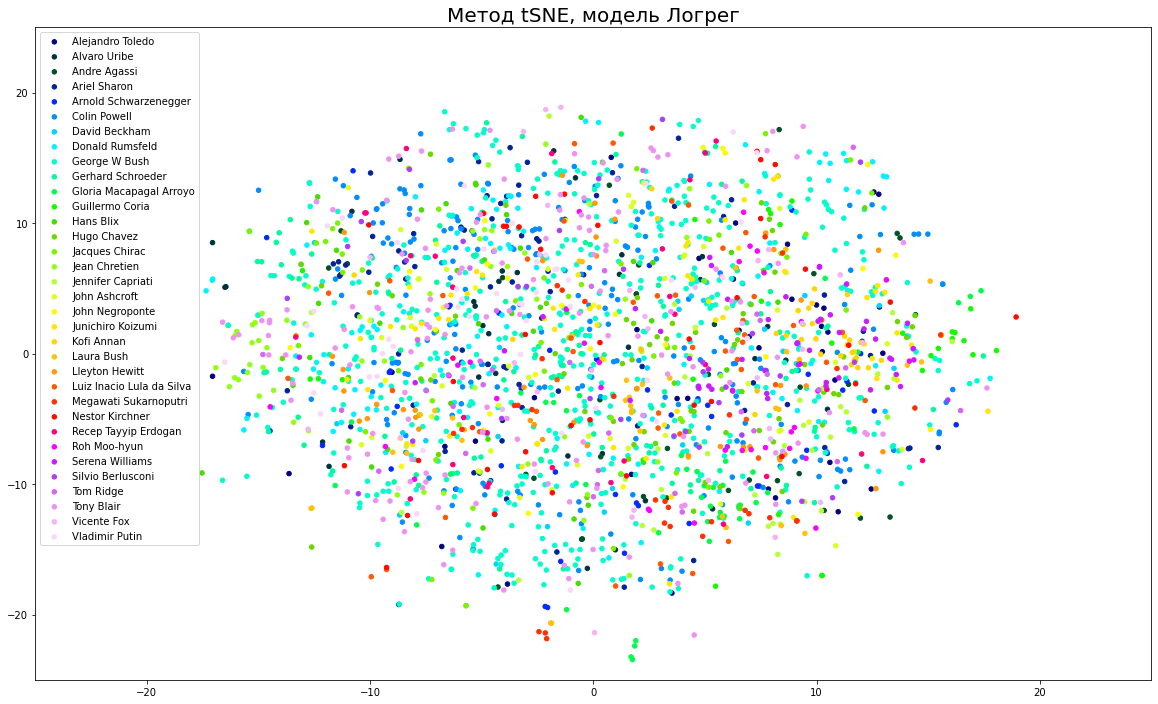

In [382]:
from matplotlib.colors import Normalize

fig = plt.figure()
fig.set_size_inches((20, 12))
ax = fig.gca()
for d in range(len(set(y))):
    norm = Normalize(vmin=0, vmax=len(set(y))) # для красивых цветов
    color = plt.cm.gist_ncar(norm(d))
    ax.scatter(X_tSNE[:, 0][y == d],
                X_tSNE[:, 1][y == d],
                c=[color] * len(X_tSNE[:, 2][y == d]), label=names[d], edgecolor='face', s=20)
plt.title(u"Метод tSNE, модель Логрег", fontsize=20)
plt.legend()
ax.set_xlim([0 - 25, 0 + 25])
ax.set_ylim([0 - 25, 0 + 25])

Видно, почему tSNE в данном случае не смог дать хороших результатов. Потеря информации слишком велика, точки разбросаны довольно хаотично.